Exploratory Data Analysis

In [2]:
import pandas as pd
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
tags_df = pd.read_csv('tags_df.csv')
rs_df = pd.read_csv('rs_df.csv')

EDA Questions:

0. What are the most popular stories?
1. What are the most popular tags?
   What are the most popular tags for the most popular (top 50%) stories?
   What are the most popular tags for the least popular (bottom 50%) stories?
2. What's the distribution of story votes?
3. Which authors have multiple stories?
4. Is the list of most popular related stories the same as the list of most popular stories?

In [7]:
tags_df.head()

,Unnamed: 0,Title,Author,Votes,Unnamed: 4,action,addiction,adventure,ai,airships,...,western,witches,wizards,wolves,wuxia,xianxia,youkai,young-adult,young-love,zombies
0,0,A Practical Guide to Evil,ErraticErrata,48110,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,Worm,Wildbow,39205,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Ward,wildbow,24154,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,The Wandering Inn,pirateaba,22462,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Metaworld Chronicles,Wutosama,20111,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
votes = tags_df['Votes'].values

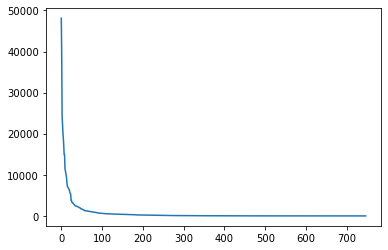

In [4]:
plt.plot(votes)

### TAGS ANALYSIS

In [59]:
sums = []
for x in tags_df.columns:
        try:
            sums.append(tags_df[x].sum())
        except:
            sums.append(0)

In [60]:
sums[0] = 'NA'
sums[1] = 'NA'
sums[2] = 'NA'
sums[3] = 'NA'
sums[4] = 'NA'

In [61]:
a_series = pd.Series(sums, index = tags_df.columns)
tags_df = tags_df.append(a_series, ignore_index=True)

In [62]:
tagsums = tags_df.iloc[747,:]

In [63]:
tagsums = tagsums.drop(['Title', 'Author', 'Votes', 'Unnamed: 0', 'Unnamed: 4'])
tagsums = tagsums.sort_values(ascending=False)

In [64]:
#What are the most popular tags?
tagsums

fantasy                  470
adventure                325
action                   296
magic                    176
science-fiction          109
complete                  98
romance                   98
superhero                 94
science-fantasy           93
series                    90
humor                     87
urban-fantasy             83
young-adult               83
coming-of-age             68
drama                     64
dark-fantasy              62
rpgs                      60
comedy                    60
teenagers                 58
horror                    53
sword-and-sorcery         52
modern-supernatural       44
monsters                  38
lesbian                   37
high-fantasy              36
anti-hero                 36
apocalyptic               35
demons                    33
supernatural              33
mystery                   33
queer                     33
post-apocalyptic          32
friendship                32
dark                      31
aliens        

<AxesSubplot:>

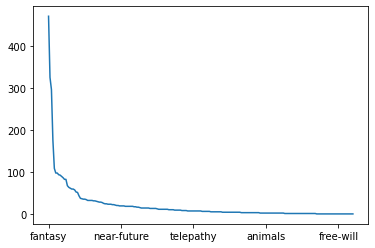

In [113]:
tagsums.plot()

In [67]:
# what are the most popular tags for the most popular stories?
sums = []
top = tags_df[0:30]
for x in top_stories.columns:
        try:
            sums.append(top_stories[x].sum())
        except:
            sums.append(0)
sums[0] = 'NA'
sums[1] = 'NA'
sums[2] = 'NA'
sums[3] = 'NA'
a_series = pd.Series(sums, index = tags_df.columns)
top_stories = top_stories.append(a_series, ignore_index=True)
top_story_tagsums = top_stories.drop(['Title', 'Author', 'Votes', 'Unnamed: 0', 'Unnamed: 4'], axis=1)
top_story_tagsums = top_story_tagsums.iloc[30,:].sort_values(ascending=False)
top_story_tagsums = pd.DataFrame(top_story_tagsums)
top_story_tagsums['title'] = top_story_tagsums.index
top_story_tagsums.index = range(len(top_story_tagsums))
top_story_tagsums

,30,title
0,22,fantasy
1,15,adventure
2,14,action
3,10,magic
4,6,humor
5,6,superhero
6,6,young-adult
7,5,rpgs
8,5,sword-and-sorcery
9,4,dark-fantasy


In [65]:
tagsums

fantasy                  470
adventure                325
action                   296
magic                    176
science-fiction          109
complete                  98
romance                   98
superhero                 94
science-fantasy           93
series                    90
humor                     87
urban-fantasy             83
young-adult               83
coming-of-age             68
drama                     64
dark-fantasy              62
rpgs                      60
comedy                    60
teenagers                 58
horror                    53
sword-and-sorcery         52
modern-supernatural       44
monsters                  38
lesbian                   37
high-fantasy              36
anti-hero                 36
apocalyptic               35
demons                    33
supernatural              33
mystery                   33
queer                     33
post-apocalyptic          32
friendship                32
dark                      31
aliens        

### RELATED STORIES ANALYSIS

In [119]:
sums = []
for x in rs_df.columns:
        try:
            sums.append(rs_df[x].sum())
        except:
            sums.append(0)

In [120]:
sums[0] = 'NA'
sums[1] = 'NA'
sums[2] = 'NA'
sums[3] = 'NA'

In [121]:
a_series = pd.Series(sums, index = rs_df.columns)
rs_df = rs_df.append(a_series, ignore_index=True)

In [122]:
rssums = rs_df.iloc[747,:]

In [123]:
rssums = rssums.drop(['Title', 'Author', 'Votes', 'Unnamed: 0'])
rssums = rssums.sort_values(ascending=False)

In [124]:
compare_df = pd.DataFrame(rs_df['Title'])

In [125]:
x = pd.DataFrame(rssums)

In [126]:
x['Title'] = x.index

In [127]:
x.index = range(len(x))

In [130]:
pd.merge(x,compare_df, on='Title')

,747,Title
0,241.0,A Practical Guide to Evil
1,222.0,Worm
2,208.0,The Wandering Inn
3,202.0,The Gods are Bastards
4,151.0,The Legion of Nothing
5,136.0,The Zombie Knight Saga
6,109.0,Metaworld Chronicles
7,107.0,The Iron Teeth
8,98.0,Twig
9,86.0,The Good Student


In [133]:
compare_df

,Title
0,A Practical Guide to Evil
1,Worm
2,Ward
3,The Wandering Inn
4,Metaworld Chronicles
5,Twig
6,Pact
7,The Zombie Knight Saga
8,The Gods are Bastards
9,How To Avoid Death On A Daily Basis


In [ ]:
pd.merge(rs_df['Title'], rssums, on=)

<AxesSubplot:>

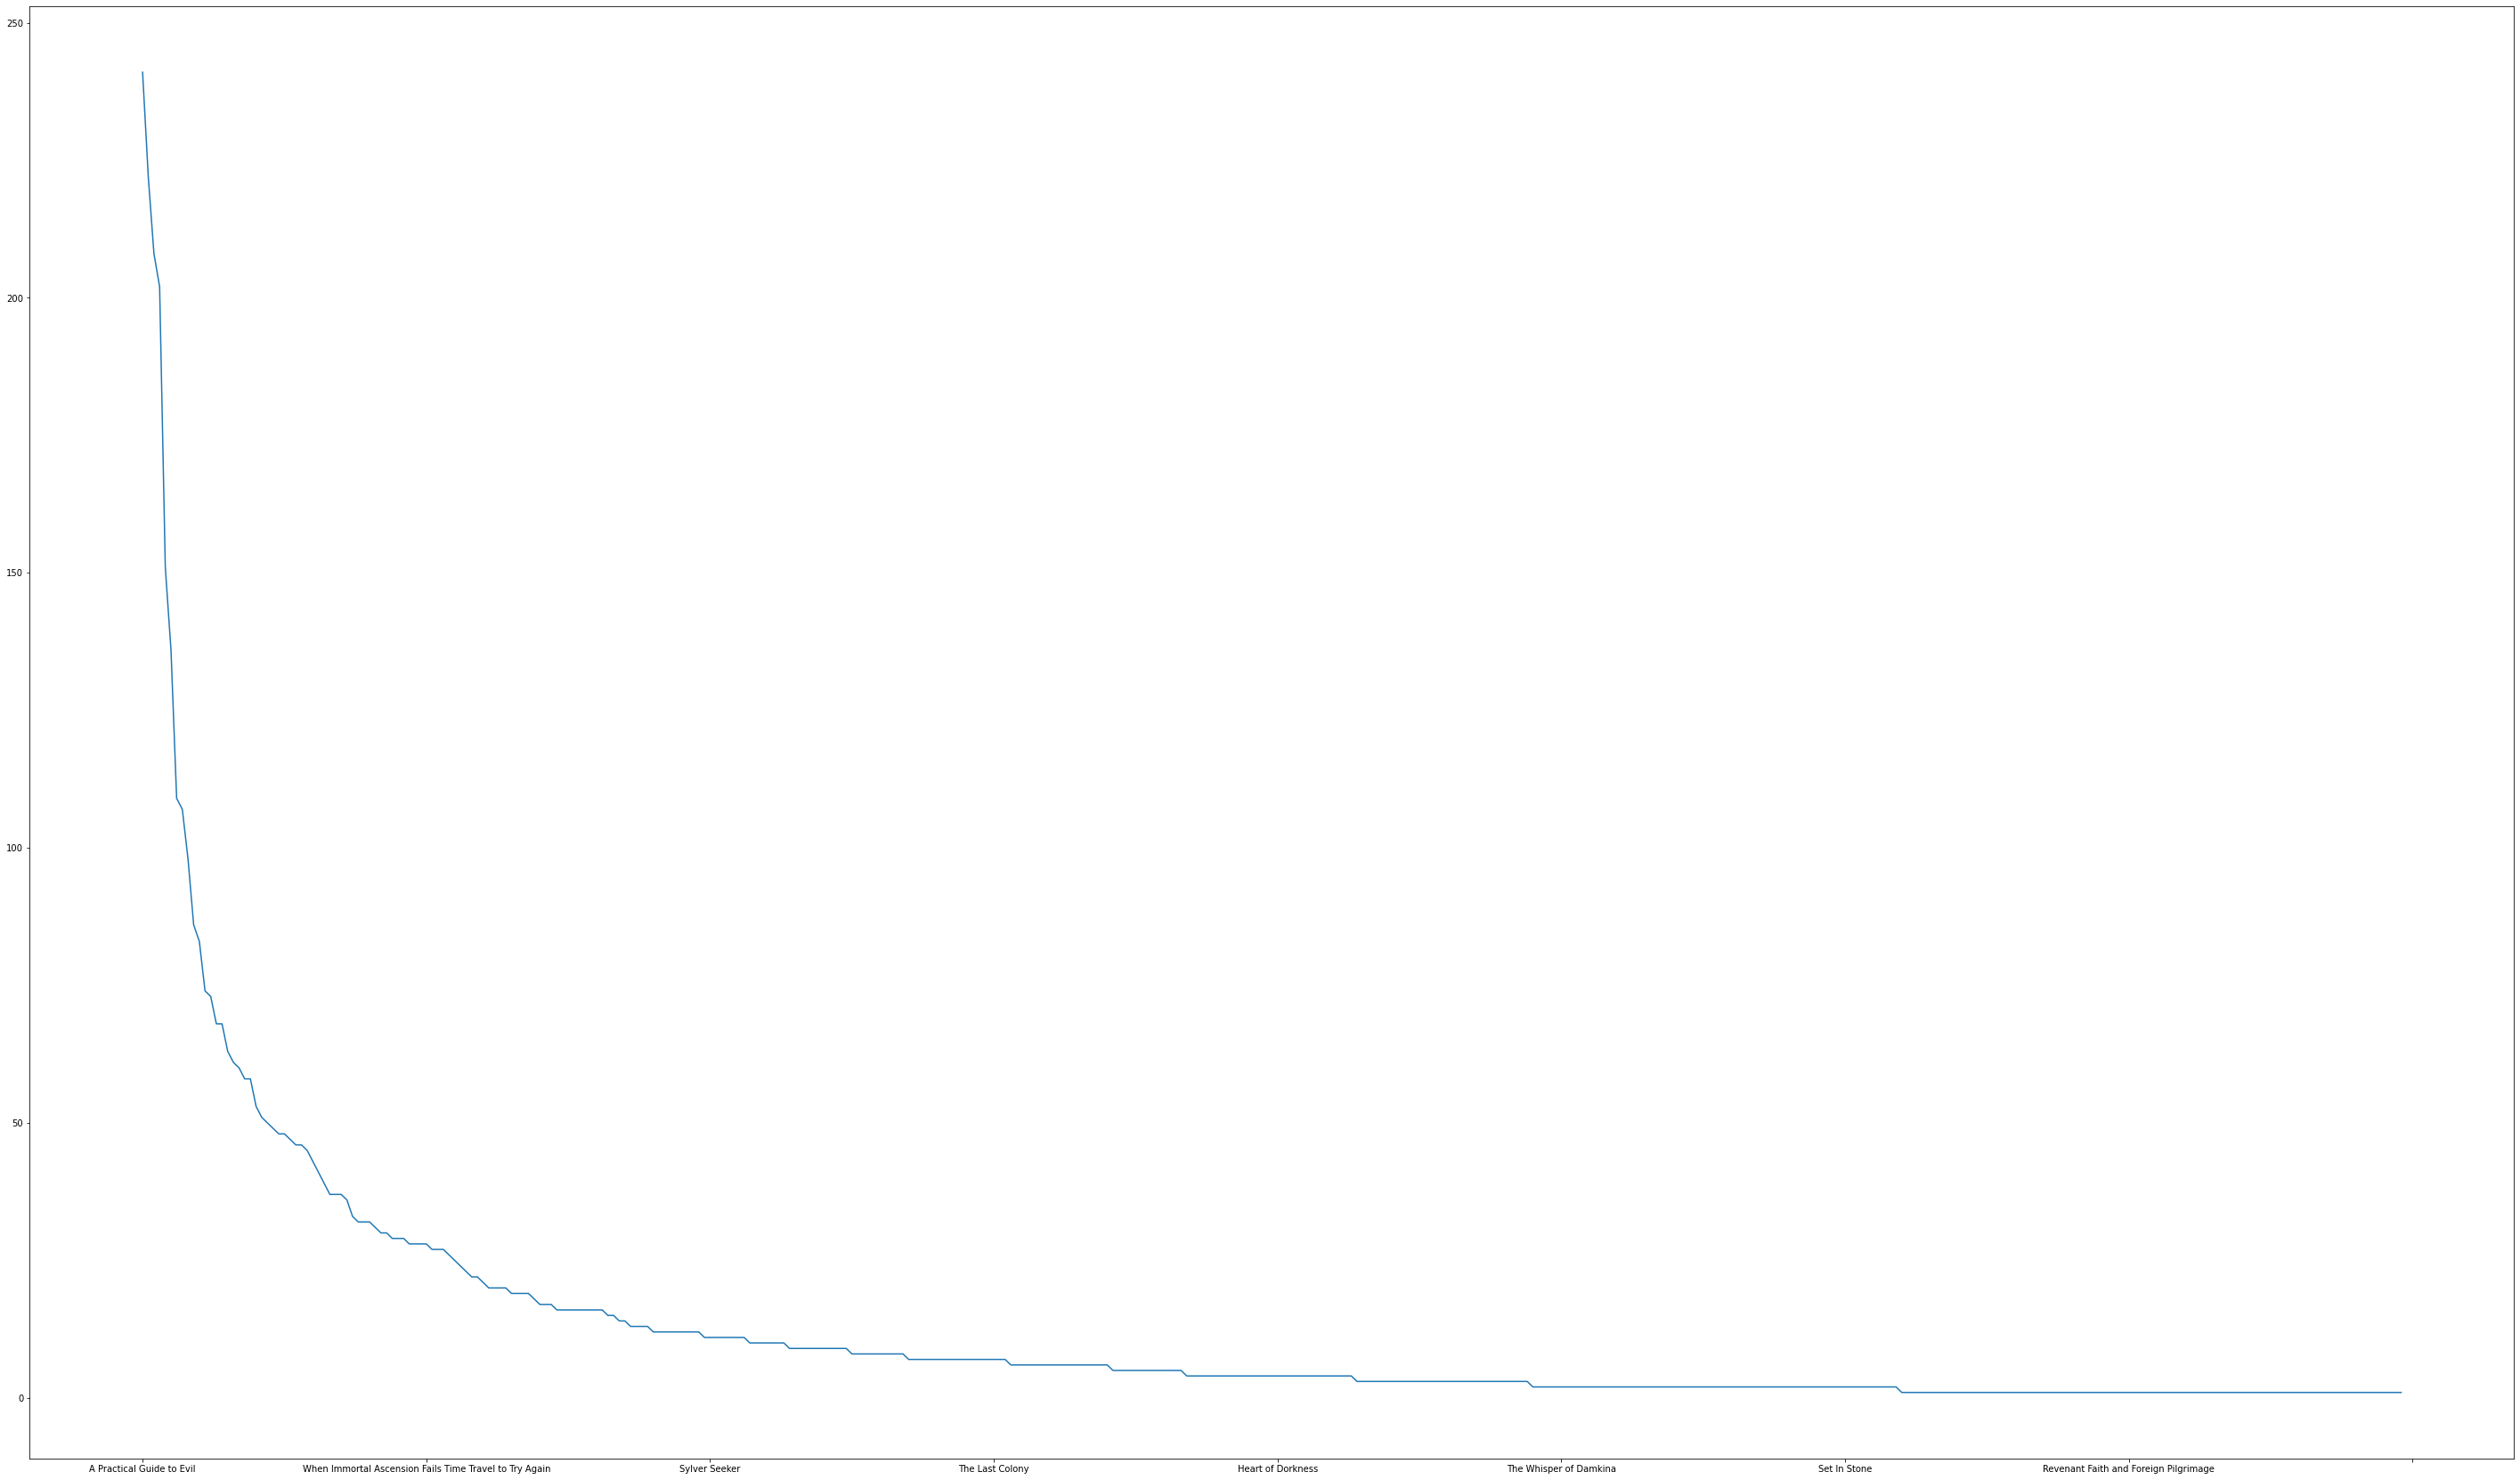

In [165]:
rssums.plot(figsize=(50,30))

In [ ]:
rankcompare['relindex'] = range(len(rankcompare))
rankcompare['Title'] = rankcompare.index
#rankcompare['absindex'] = 

In [ ]:
pd.set_option('display.max_rows', None)

In [164]:
pd.merge(rankcompare, rs_df, on='Title').iloc[:,1:20]

NameError: name 'rankcompare' is not defined